# Data Loading

In [86]:
import pandas as pd

data = pd.read_csv(r'C:\Users\sarav\Desktop\diabetes.csv')
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35.0,0,33.6,0.627,50.0,1
1,1,85.0,66,29.0,0,26.6,0.351,31.0,0
2,8,183.0,64,0.0,0,23.3,0.672,32.0,1
3,1,89.0,66,23.0,94,28.1,0.167,21.0,0
4,0,137.0,40,NaN,168,43.1,2.288,33.0,1


In [165]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128043,0.141282,-0.076714,-0.073535,0.017683,-0.033523,0.534233,0.221898
Glucose,0.128043,1.000000,0.151471,0.059373,0.313670,0.223661,0.134795,0.255367,0.462402
BloodPressure,0.141282,0.151471,1.000000,0.205383,0.088933,0.281805,0.041265,0.232864,0.065068
SkinThickness,-0.076714,0.059373,0.205383,1.000000,0.434831,0.391518,0.175400,-0.101914,0.069559
Insulin,-0.073535,0.313670,0.088933,0.434831,1.000000,0.197859,0.185071,-0.066761,0.130548
BMI,0.017683,0.223661,0.281805,0.391518,0.197859,1.000000,0.140647,0.056106,0.292695
DiabetesPedigreeFunction,-0.033523,0.134795,0.041265,0.175400,0.185071,0.140647,1.000000,0.024810,0.173844
Age,0.534233,0.255367,0.232864,-0.101914,-0.066761,0.056106,0.024810,1.000000,0.225343
Outcome,0.221898,0.462402,0.065068,0.069559,0.130548,0.292695,0.173844,0.225343,1.000000


In [114]:
data1 = data[['Glucose','BloodPressure','BMI','Outcome']]

# Missing Value Imputation

In [112]:
data1.isnull().sum()

Glucose          0
BloodPressure    0
BMI              0
dtype: int64

In [88]:
data['Glucose'].fillna(119,inplace=True)
data['SkinThickness'].fillna(20,inplace=True)
data['Age'].fillna(20,inplace=True)

# Detecting Outliers

In [80]:
import matplotlib.pyplot as plt
data['BMI'].describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x21b3c4056a0>],
 'caps': [<matplotlib.lines.Line2D at 0x21b3c3a68d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x21b3c3cfa20>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x21b3c3a6588>],
 'whiskers': [<matplotlib.lines.Line2D at 0x21b3c4050f0>,
  <matplotlib.lines.Line2D at 0x21b3c4057f0>]}

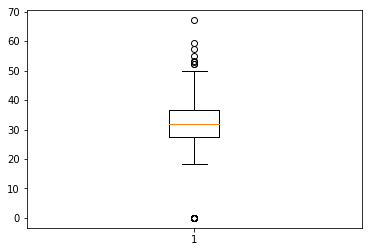

In [81]:
plt.boxplot(data['BMI'])

In [115]:
data1.columns

Index(['Glucose', 'BloodPressure', 'BMI', 'Outcome'], dtype='object')

In [116]:
import sklearn
from sklearn.preprocessing import StandardScaler,scale,normalize
x = data1[['Glucose', 'BloodPressure', 'BMI']]
y = data1['Outcome']

# Standarize or Normalize the dataset

In [117]:
x = normalize(x)


In [94]:
data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35.0,0,33.6,0.627,50.0,1
1,1,85.0,66,29.0,0,26.6,0.351,31.0,0
2,8,183.0,64,0.0,0,23.3,0.672,32.0,1


In [118]:
x

array([[0.88106227, 0.42862489, 0.20002495],
       [0.76677585, 0.5953789 , 0.23995574],
       [0.93719444, 0.32776199, 0.11932585],
       ...,
       [0.84486495, 0.50272956, 0.1829377 ],
       [0.88256569, 0.42026938, 0.21083514],
       [0.77303875, 0.58185713, 0.25269224]])

# Train-Test Split

In [150]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25)

# Model Building

In [151]:
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV

In [173]:
model1 = LogisticRegression(solver='lbfgs')
model2 = LogisticRegression()
model3 = LogisticRegression(solver='saga')

In [174]:
model1.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [175]:
model2.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [176]:
model3.fit(xtrain,ytrain)

C:\Users\sarav\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='saga', tol=0.0001,
          verbose=0, warm_start=False)

In [177]:
pred1 = model1.predict(xtest)
pred2 = model2.predict(xtest)
pred3 = model3.predict(xtest)

In [178]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report

In [179]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error,accuracy_score

In [180]:
confusion_matrix(ytest,pred1)

array([[15,  0,  0],
       [ 0, 10,  6],
       [ 0,  4,  3]], dtype=int64)

In [187]:
accuracy_score(ytest,pred1)

0.7368421052631579

In [189]:
print(classification_report(ytest,pred1))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       0.71      0.62      0.67        16
          2       0.33      0.43      0.38         7

avg / total       0.76      0.74      0.74        38



In [128]:
accuracy_score(ytest,pred1)

0.6875

In [110]:
confusion_matrix(ytest,pred2)

array([[109,  14],
       [ 58,  11]], dtype=int64)

In [129]:
accuracy_score(ytest,pred2)

0.6614583333333334

In [125]:
confusion_matrix(ytest,pred3)

array([[128,  10],
       [ 48,   6]], dtype=int64)

In [130]:
accuracy_score(ytest,pred3)

0.6979166666666666

In [126]:
confusion_matrix(ytest,pred4)

array([[123,  15],
       [ 41,  13]], dtype=int64)

In [131]:
accuracy_score(ytest,pred4)

0.7083333333333334

In [132]:
print(precision_score(ytest,pred4))
print(recall_score(ytest,pred4))

0.4642857142857143
0.24074074074074073


In [149]:
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data[:, :2]  # we only take the first two features.
y = iris.target

In [148]:
iris.data[:,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [161]:
pred1

array([2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 1])

In [164]:
ytest

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 2, 0,
       2, 1, 0, 1, 1, 0, 2, 0, 1, 2, 2, 2, 0, 1, 0, 1])

In [163]:
xtest

array([[5.6, 3. ],
       [5.5, 2.5],
       [5.5, 2.6],
       [4.4, 3. ],
       [6.2, 2.2],
       [5. , 3.5],
       [7. , 3.2],
       [6.3, 2.3],
       [6. , 2.9],
       [5.9, 3. ],
       [5. , 3.3],
       [4.9, 3.1],
       [5. , 3.6],
       [6.4, 3.2],
       [4.6, 3.4],
       [5.5, 4.2],
       [5.4, 3.4],
       [5.2, 3.5],
       [6.1, 2.6],
       [6. , 2.7],
       [5.8, 2.7],
       [5.8, 4. ],
       [6.9, 3.1],
       [5.7, 2.6],
       [4.9, 3.1],
       [5. , 2. ],
       [5.6, 2.9],
       [5.7, 4.4],
       [6.7, 3.1],
       [4.8, 3.1],
       [6. , 3.4],
       [6. , 2.2],
       [7.7, 2.6],
       [5.8, 2.8],
       [5. , 3.4],
       [6.1, 2.9],
       [4.6, 3.1],
       [4.9, 2.4]])